In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#classification for the rice
def get_classificaton(ratio):
	ratio =round(ratio,1)
	toret=""
	if(ratio>=3):
		toret="Slender"
	elif(ratio>=2.1 and ratio<3):
		toret="Medium"
	elif(ratio>=1.1 and ratio<2.1):
		toret="Bold"
	elif(ratio<=1):
		toret="Round"
	toret="("+toret+")"
	return toret

In [69]:
#load the image 
print("Starting")
img = cv2.imread('images/rice.png',0)

Starting


In [70]:
#convert into binary
# 160 - threshold, 255 - value to assign, THRESH_BINARY_INV - Inverse binary
ret,binary = cv2.threshold(img,160,255,cv2.THRESH_BINARY)

In [71]:
#averaging filter or make edges clear
# -1 : depth of the destination image
kernel = np.ones((5,5),np.float32)/9
dst = cv2.filter2D(binary,-1,kernel)

In [72]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))

#erosion :- flatining of the edges 
erosion = cv2.erode(dst,kernel2,iterations = 1)

In [73]:
#dilation:- rebuild the edges
dilation = cv2.dilate(erosion,kernel2,iterations = 1)

In [74]:
#edge detection
edges = cv2.Canny(dilation,100,200)

In [75]:
### Size detection
contours,_ = cv2.findContours(erosion, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("No. of rice grains=",len(contours))

No. of rice grains= 30


In [76]:
#find the grain quality
total_ar=0
for cnt in contours:
	x,y,w,h = cv2.boundingRect(cnt)
	aspect_ratio = float(w)/h
	if(aspect_ratio<1):
		aspect_ratio=1/aspect_ratio
	print(round(aspect_ratio,2),get_classificaton(aspect_ratio))
	total_ar+=aspect_ratio
avg_ar=total_ar/len(contours)
print( "Average Aspect Ratio=",round(avg_ar,2),get_classificaton(avg_ar))

3.17 (Slender)
1.73 (Bold)
2.38 (Medium)
1.07 (Bold)
1.14 (Bold)
2.11 (Medium)
4.0 (Slender)
1.55 (Bold)
2.11 (Medium)
3.5 (Slender)
2.22 (Medium)
2.75 (Medium)
1.14 (Bold)
3.0 (Slender)
2.2 (Medium)
1.91 (Bold)
2.86 (Medium)
1.12 (Bold)
2.86 (Medium)
3.0 (Slender)
1.33 (Bold)
2.11 (Medium)
2.33 (Medium)
3.0 (Slender)
2.38 (Medium)
1.67 (Bold)
1.73 (Bold)
2.62 (Medium)
2.86 (Medium)
3.14 (Slender)
Average Aspect Ratio= 2.3 (Medium)


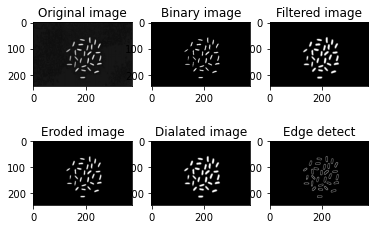

In [77]:
#plot the images
imgs_row=2
imgs_col=3
plt.subplot(imgs_row,imgs_col,1),plt.imshow(img,'gray')
plt.title("Original image")

plt.subplot(imgs_row,imgs_col,2),plt.imshow(binary,'gray')
plt.title("Binary image")

plt.subplot(imgs_row,imgs_col,3),plt.imshow(dst,'gray')
plt.title("Filtered image")

plt.subplot(imgs_row,imgs_col,4),plt.imshow(erosion,'gray')
plt.title("Eroded image")

plt.subplot(imgs_row,imgs_col,5),plt.imshow(dilation,'gray')
plt.title("Dialated image")

plt.subplot(imgs_row,imgs_col,6),plt.imshow(edges,'gray')
plt.title("Edge detect")

plt.show()